In [1]:
from matplotlib import pyplot
import numpy

In [2]:
pyplot.rcParams["figure.figsize"] = 20, 20

In [3]:
def plot_grid(
    MIN_x, #  if only one parameter is given, it is actually the maximum x
    MAX_x=None, 
    MIN_y=None, 
    MAX_y=None, 
    N_x=None,  # number of grid lines
    N_y=None,  # number of grid lines
    filename="coordinate_grid.png"
):
    """Creates a coordinate plane.
    If only one (numerical) argument is given, e.g.,:
    >> plot_grid(10)
    then it will create a square grid and save it as coordinate_grid.png.

    If two are given, then these will be the minimum and maximum coordinates:
    >> plot_grid(0, 5)
    If four are given, then you can have different x and y axes:
    
    >> plot_grid(-2 * numpy.pi, 2 * numpy.pi, -1, 1))
    """
    
    if MAX_x is None:
        MIN_x, MAX_x = - MIN_x, MIN_x
        
    if MIN_y is None:
        MIN_y = MIN_x
        
    if MAX_y is None:
        MAX_y = MAX_x
    
    if N_x is None:
        N_x = MAX_x - MIN_x + 1
    
    if N_y is None:
        N_y = MAX_y - MIN_y + 1
    
    pyplot.rcParams["figure.figsize"] = 20 * N_x/N_y, 20
    
    step_x = (MAX_x - MIN_x)/ (N_x - 1)
    step_y = (MAX_y - MIN_y)/ (N_y - 1)

    fig, ax = pyplot.subplots()

    x = numpy.arange(MIN_x, MAX_x + step_x/2, step_x)
    y = numpy.arange(MIN_y, MAX_y + step_y/2, step_y)

    # plot horizontal grid lines
    for i in numpy.arange(MIN_y, MAX_y + step_y/2, step_y):
        c = numpy.repeat(i, len(x))
        pyplot.plot(x, c, color='LightGrey', zorder=-10)

    # plot vertical grid lines
    for i in numpy.arange(MIN_x, MAX_x + step_x/2, step_x ):
        c = numpy.repeat(i, len(y))
        pyplot.plot(c, y, color='LightGrey', zorder=-10)

    ax.set_xticks(list(numpy.arange(MIN_x, MAX_x + step_x, step_x )))
    ax.set_yticks(list(numpy.arange(MIN_y, MAX_y + step_y, step_y)))

    ax.spines[["left", "bottom"]].set_position(("data", 0))
    ax.spines["bottom"].set_bounds(MIN_x -  0.025 * (MAX_x - MIN_x), MAX_x + 0.025 * (MAX_x - MIN_x))
    ax.spines["left"].set_bounds(MIN_y - 0.025 * (MAX_y - MIN_y), MAX_y + 0.025 * (MAX_y - MIN_y))
    ax.spines[["top", "right"]].set_visible(False)

    ax.plot(0.975, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 0.975, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
    ax.plot(0.025, 0, "<k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 0.025, "vk", transform=ax.get_xaxis_transform(), clip_on=False)
    
    ax.text(0, MAX_y + 0.035 * (MAX_y - MIN_y), "y", fontdict={"fontfamily":"Verdana", "fontsize":20}, horizontalalignment='center' )
    ax.text(MAX_x + 0.035 * (MAX_x - MIN_x), 0, "x", fontdict={"fontfamily":"Verdana", "fontsize":20}, verticalalignment='center' )

    for tick in ax.get_xticklabels():
        tick.set_fontname("Verdana")
        tick.set_fontsize(12)

    for tick in ax.get_yticklabels():
        tick.set_fontname("Verdana")
        tick.set_fontsize(12)

    pyplot.savefig(filename) # save as png

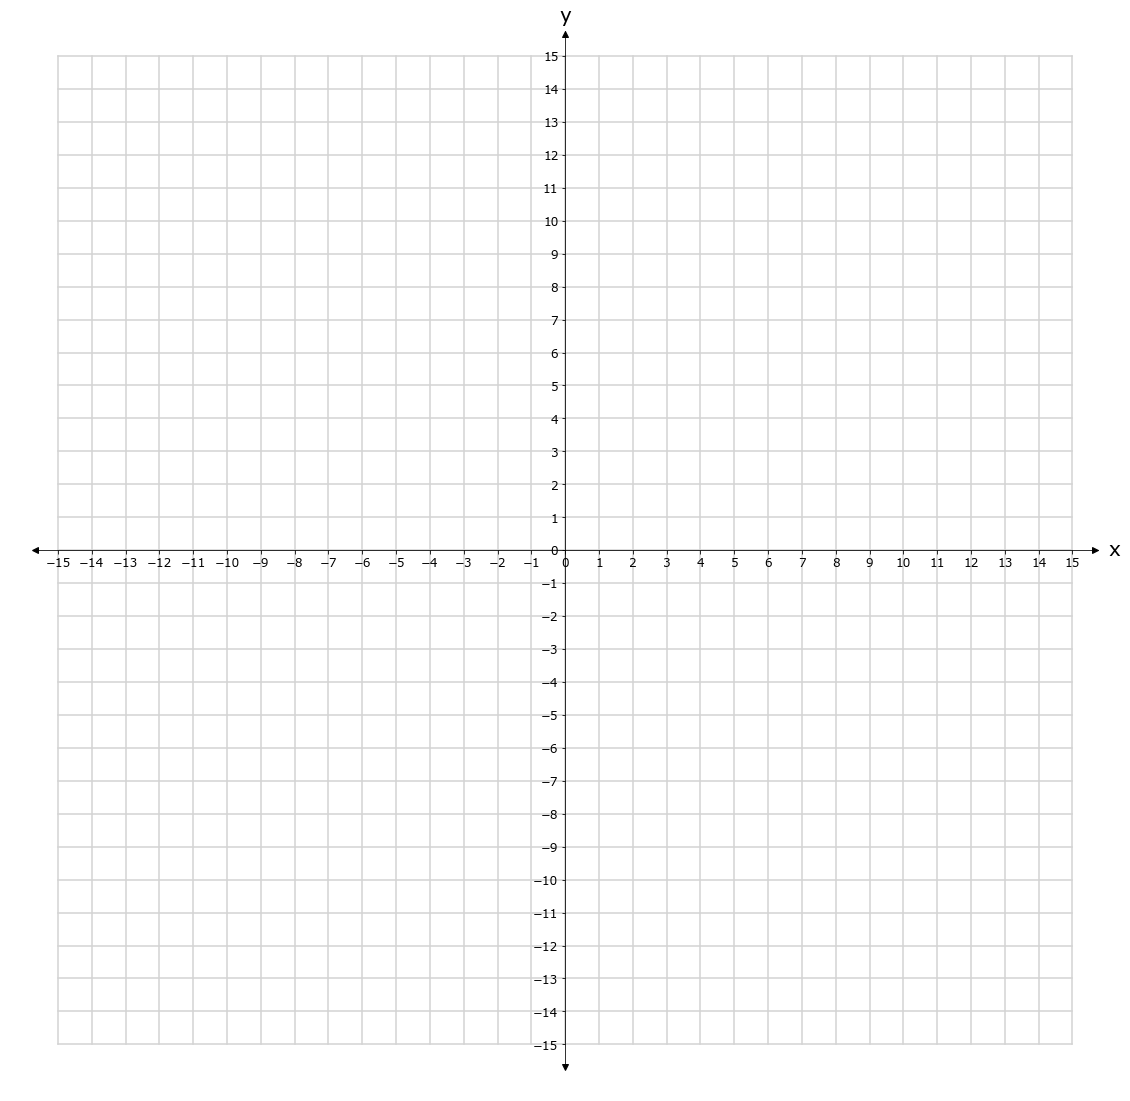

In [5]:
plot_grid(15)